Web - craping project to get iphones prices from mercado livre and make analisys

In [1]:
#libraries
import requests 
from bs4 import BeautifulSoup 
import pandas as pd
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
from warnings import warn
import matplotlib.pyplot as plt
%matplotlib inline

the first sped is get the URL and see it params
https://celulares.mercadolivre.com.br/iphone/_Desde_1_NoIndex_True
we can see that the pagination is defined by '_Desde_1', this say that this page show iphones from 1 to 50
this information is very important for our code

In [3]:
url = "https://celulares.mercadolivre.com.br/iphone/_Desde_1_NoIndex_True"
response = requests.get(url)

In [4]:
html_soup = BeautifulSoup(response.text, 'html.parser')

Taking another look to the source code of the page we see that the itens are listed by the class ui-search-layout__item

In [11]:
iphones_container = html_soup.find_all('li',class_='ui-search-layout__item')

In [14]:
iphone = iphones_container[0]
    

In [41]:
iphone_name = iphone.find('div',class_="ui-search-item__group ui-search-item__group--title").h2.text

In [42]:
iphone_name

'Apple iPhone 12 (64 GB) - Preto'

In [50]:
iphone_price = iphone.find('span',class_="price-tag ui-search-price__part").text.split()
iphone_price = int(iphone_price[0])

In [51]:
iphone_price

5080

In [60]:
iphone_reviews = int(iphone.find('span',class_="ui-search-reviews__amount").text)

In [61]:
iphone_reviews

490

If an iphone was recentily added to the page it won't have any review so we will skip it from our scraping with this if 
if container.find('span',class_="ui-search-reviews__amount") is not None

In [62]:
names = []
prices = []
reviews = []

for container in iphones_container:
    if container.find('span',class_="ui-search-reviews__amount") is not None:
        
        name = container.find('div',class_="ui-search-item__group ui-search-item__group--title").h2.text
        names.append(name)
        
        price = container.find('span',class_="price-tag ui-search-price__part").text.split()
        prices.append(int(price[0]))
        
        review = int(container.find('span',class_="ui-search-reviews__amount").text)
        reviews.append(review)

In [63]:
iphones_dataFrame = pd.DataFrame({
    'Title':names,
    'Prices':prices,
    'Number of reviews':reviews
})

In [67]:
iphones_dataFrame.sort_values(by=['Prices'],ascending=False)

,Title,Prices,Number of reviews
31,Apple iPhone 13 Pro (1 TB) - Azul-Sierra,12999,16
20,Apple iPhone 12 Pro (256 GB) - Prateado,10999,26
16,Apple iPhone 13 (512 GB) - Meia-noite,8739,19
13,Apple iPhone 13 Pro (256 GB) - Azul-Sierra,8388,16
6,Apple iPhone 13 Pro (128 GB) - Prateado,8269,16
24,Apple iPhone 13 Pro Max (256 GB) - Azul-Sierra,8171,24
10,Apple iPhone 13 Pro Max (128 GB) - Grafite,7979,24
25,Apple iPhone 12 Pro (128 GB) - Azul-pacífico,7849,26
17,Apple iPhone 13 mini (256 GB) - (PRODUCT)RED,7599,10
18,Apple iPhone 12 mini (256 GB) - Azul,7599,65


these are the iphones from the 1th page

Now making a version that gets the iphones from 20 pages, using the sleep function to simulate a human request

In [80]:
# Redeclaring the lists to store data in
names = []
prices = []
reviews = []

# Preparing the monitoring of the loop
start_time = time()
requests_number = 0
initial_number = 1

for i in range(20):
    url = "https://celulares.mercadolivre.com.br/iphone/_Desde_"+str(initial_number)+"_NoIndex_True"
    response = requests.get(url)
    
    # Pause the loop
    sleep(randint(8,15))
    
    # Monitor the requests
    requests_number += 1
    print('Request:{}'.format(requests_number))
    print(url)
    clear_output(wait = True)
    
    
    # Throw a warning for non-200 status codes
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
    
    if requests_number > 40:
        warn('Number of requests was greater than expected.')  
        break     
    
    # Parse the content of the request with BeautifulSoup
    html_soup = BeautifulSoup(response.text, 'html.parser')

    iphones_container = html_soup.find_all('li',class_='ui-search-layout__item')
    for container in iphones_container:
        if container.find('span',class_="ui-search-reviews__amount") is not None:

            name = container.find('div',class_="ui-search-item__group ui-search-item__group--title").h2.text
            names.append(name)

            price = container.find('span',class_="price-tag ui-search-price__part").text.split()
            prices.append(int(price[0]))

            review = int(container.find('span',class_="ui-search-reviews__amount").text)
            reviews.append(review)
    initial_number+=50

Request:20
https://celulares.mercadolivre.com.br/iphone/_Desde_951_NoIndex_True


In [81]:
iphones_dataFrame = pd.DataFrame({
    'Title':names,
    'Prices':prices,
    'Number of reviews':reviews
})

In [82]:
iphones_dataFrame.sort_values(by=['Prices'],ascending=False)

,Title,Prices,Number of reviews
31,Apple iPhone 13 Pro (1 TB) - Azul-Sierra,12999,16
22,Apple iPhone 12 Pro (256 GB) - Prateado,10999,26
34,Apple iPhone 13 Pro Max (512 GB) - Azul-Sierra,10394,24
38,Apple iPhone 12 Pro Max (512 GB) - Azul-pacífico,8999,77
17,Apple iPhone 13 (512 GB) - Meia-noite,8739,19
41,Apple iPhone 13 mini (512 GB) - Rosa,8429,11
37,Apple iPhone 13 mini (512 GB) - Rosa,8429,11
13,Apple iPhone 13 Pro (256 GB) - Azul-Sierra,8388,16
6,Apple iPhone 13 Pro (128 GB) - Prateado,8366,16
10,Apple iPhone 13 Pro Max (128 GB) - Grafite,8299,24


Looks strange that a request from 20 pages with 50 cellphones each(20*50=1000) only returns 48, investigating i found that from the 4th page onwards no iphone has a review so the code just skip and move to the next page, would have been nice noticed this before wasting time on 16 requests but it is also an insight that people tend to buy things from the front pages.

Looking further into the dataFrame we can note some duplicated datas, using pandas duplicated function we can see that there are 4 duplicates

In [83]:
iphones_dataFrame.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43    False
44    False
dtype: bool

we gonna drop this rows

In [84]:
iphones_dataFrame.drop_duplicates(keep=False,inplace=True)

In [85]:
iphones_dataFrame.sort_values(by=['Prices'],ascending=False)

,Title,Prices,Number of reviews
31,Apple iPhone 13 Pro (1 TB) - Azul-Sierra,12999,16
22,Apple iPhone 12 Pro (256 GB) - Prateado,10999,26
34,Apple iPhone 13 Pro Max (512 GB) - Azul-Sierra,10394,24
38,Apple iPhone 12 Pro Max (512 GB) - Azul-pacífico,8999,77
17,Apple iPhone 13 (512 GB) - Meia-noite,8739,19
13,Apple iPhone 13 Pro (256 GB) - Azul-Sierra,8388,16
6,Apple iPhone 13 Pro (128 GB) - Prateado,8366,16
10,Apple iPhone 13 Pro Max (128 GB) - Grafite,8299,24
26,Apple iPhone 13 Pro Max (256 GB) - Azul-Sierra,8171,24
42,iPhone XS 256 GB prateado,7960,87


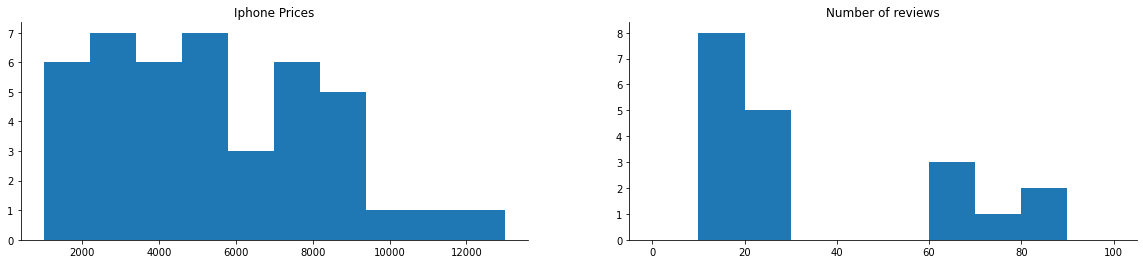

In [86]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,4))
ax1, ax2 = fig.axes

ax1.hist(iphones_dataFrame['Prices'], bins = 10, range = (1000,13000)) # bin range = 1
ax1.set_title('Iphone Prices')

ax2.hist(iphones_dataFrame['Number of reviews'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Number of reviews')


for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

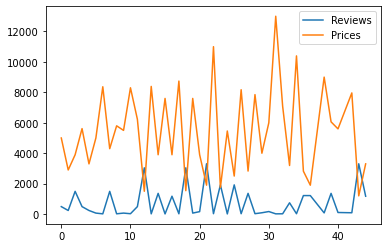

In [87]:
plt.plot(iphones_dataFrame['Number of reviews'],label='Reviews')
plt.plot(iphones_dataFrame['Prices'],label='Prices')
plt.legend();

We can notice that the reviews peak is when the price is about to 3k, this shows that most people buy iphones at that price 

In [88]:
iphones_dataFrame.to_csv('iphones_prices.csv')